Objective for Analysis : For the given willingness to pay (wtp) data , estimate the distribution , find out the parameters and create the demand and profit functions. Optimize the profit function for maximum profit.       

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from scipy.optimize  import minimize

In [2]:
wtp_data = pd.read_csv("wtpData.csv")

In [3]:
wtp_data.head()

,Wtp
0,48
1,56
2,50
3,42
4,49


In [4]:
wtp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wtp     60 non-null     int64
dtypes: int64(1)
memory usage: 608.0 bytes


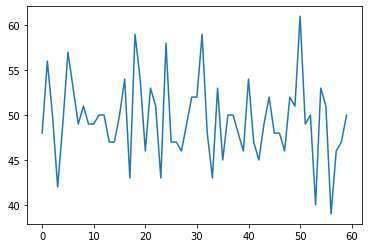

In [5]:
plt.plot(wtp_data)

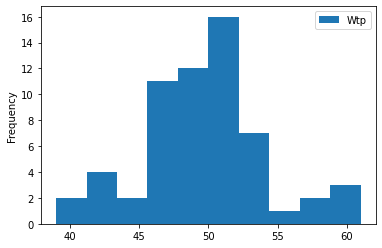

In [6]:
wtp_data.plot(kind = 'hist')

Fit a logistic distribution for the wtp data. Calculate the values of mean and scale. 

In [14]:
m = wtp_data['Wtp'].mean()
sd = wtp_data['Wtp'].std()

In [16]:
m , sd

(49.516666666666666, 4.443588665255674)

In [17]:
scale = np.sqrt(3*(sd**2)/ (3.14**2))

In [18]:
scale

2.4511214446369425

In [7]:
from scipy.stats import logistic

logistic.cdf(0.458)


0.6125396134409151

In [22]:
logistic.cdf(40 , m, scale)

0.02018198343054166

In [10]:
mean , var 

(array(0.), array(3.28986813))

For given values of price, cost ,marketshare and the parameters of the wtp distribution, demand can be estimated and hence profit function can be formulated. This function is optimised for maximum profit.  

In [63]:
def calc_profit(price):
    profit = (price - cost)*mktsize*(1- logistic.cdf(price, m , scale))
    
    return -profit

In [64]:
price = 40
cost = 30
mktsize = 1000
demand = mktsize*(1- logistic.cdf(price, m , scale))
calc_profit(price)

-9866.009054965765

In [41]:
bounds = [(40,60)]

In [42]:
## using minimize function, get the optimal price.
soln = minimize(calc_profit , 25,  bounds = bounds ,  method = 'SLSQP' , options = {'disp' : True} )

Optimization terminated successfully    (Exit mode 0)
            Current function value: [-12979.88138164]
            Iterations: 5
            Function evaluations: 12
            Gradient evaluations: 5


In [49]:
opt_price = soln.x
print("Optimal price for the given parameters :{}".format(opt_price))

Optimal price for the given parameters :[45.43101314]


In [47]:
print("Optimized profit  for the given parameters :{}".format(-soln.fun))

Optimised profit  for the given parameters :[12979.88138164]


In [76]:
## bootstrap 1000 samples from the wtp distribution and find the range of optimised price. 

profits = []

for i in range(10):
    
    sub_sample_df = wtp_data['Wtp'].sample(n=60 , replace = False )
    m = sub_sample_df.mean()
    sd = sub_sample_df.std()
    scale = np.sqrt(3*(sd**2)/ (3.14**2))
    print(m, scale)
    ##
    price = opt_price
    cost = 15
    mktsize = 10000
    demand = mktsize*(1- logistic.cdf(price, m , scale))
    profit = -(calc_profit(price))
    profits.append(profit[0])
    
profits = pd.Series(profits)
    #
print(profits)
profits.quantile([0.025, 0.975])

49.516666666666666 2.451121444636942
49.516666666666666 2.451121444636942
49.516666666666666 2.451121444636942
49.516666666666666 2.4511214446369425
49.516666666666666 2.451121444636942
49.516666666666666 2.4511214446369425
49.516666666666666 2.4511214446369425
49.516666666666666 2.451121444636942
49.516666666666666 2.4511214446369425
49.516666666666666 2.4511214446369425
0    255972.136932
1    255972.136932
2    255972.136932
3    255972.136932
4    255972.136932
5    255972.136932
6    255972.136932
7    255972.136932
8    255972.136932
9    255972.136932
dtype: float64


0.025    255972.136932
0.975    255972.136932
dtype: float64